In [ ]:
#!pip install --upgrade statsmodels

In [20]:
#Check Version
import statsmodels._version
statsmodels._version.get_versions()['version'] == '0.11.1'

True

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
cd "/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data"

/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data


In [23]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [24]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [25]:
df.index.freq = 'MS' #Monthly Start

In [26]:
df.tail() #Data finishes in the end of the 60's

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


Train Test Split

In [27]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [28]:
print(f'Test Set has {len(test_data):.0f} elements and it is {len(test_data)/len(df):.0%} of the total dataset.')

Test Set has 36 elements and it is 25% of the total dataset.


#Statistical Model

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [30]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [31]:
test_predictions = fitted_model.forecast(36)

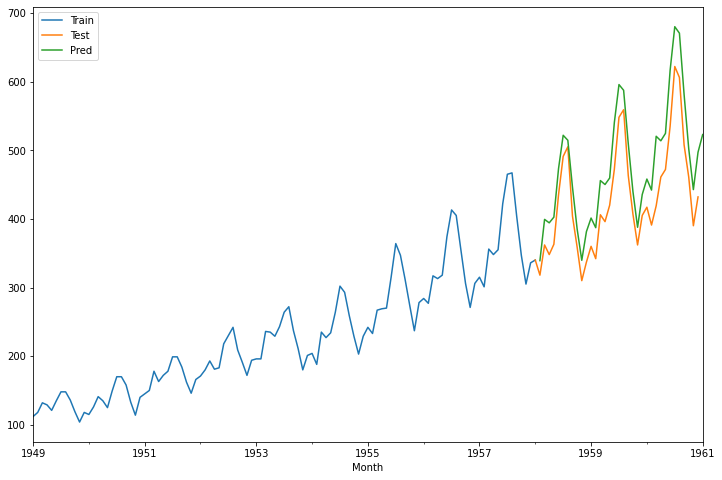

In [32]:
train_data['Thousands of Passengers'].plot(legend = True, label = 'Train',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend = True, label = 'Test')
test_predictions.plot(legend = True, label = 'Pred')

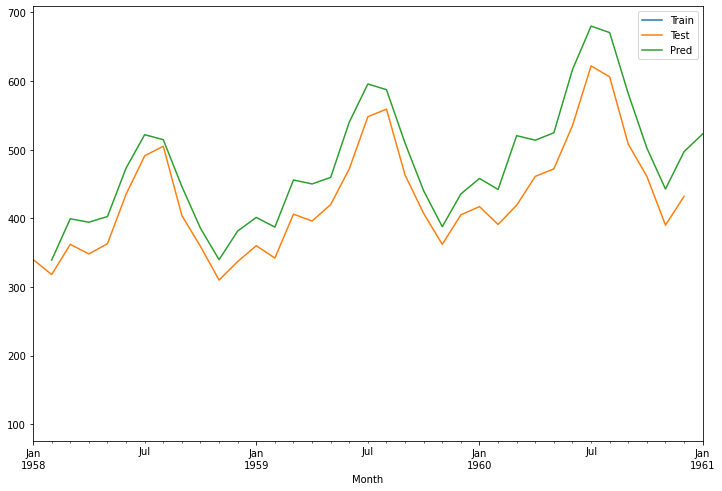

In [33]:
train_data['Thousands of Passengers'].plot(legend = True, label = 'Train',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend = True, label = 'Test')
test_predictions.plot(legend = True, label = 'Pred',xlim=['1958-01-01','1961-01-01'])

#Evaluating Forecast Predictions

*   Mean Absolute Error (MAE)
*   Root Mean Square Error (RMSE)
*   R Squared (R2)



In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [35]:
print(mean_absolute_error(test_data,test_predictions))

63.03138491847624


In [36]:
print(sqrt(mean_squared_error(test_data,test_predictions)))

74.92943823976594


In [37]:
#Checking the average and other statistics of the test data to evaluate if the MAE and RMSE is good or bad
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


#Forecasting into the future

In [38]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [39]:
forecast_predictions = final_model.forecast(36)

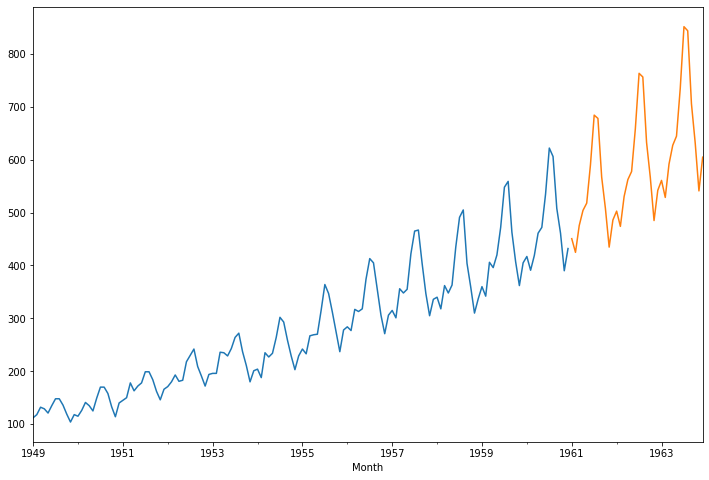

In [40]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

In [41]:
df2 = pd.read_csv('samples.csv',index_col=0,parse_dates=True)

#Stationary vs Non Stationary

Stationary data

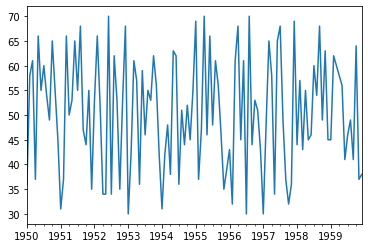

In [42]:
df2['a'].plot()

Non stationary data:
- show trend or seasonality

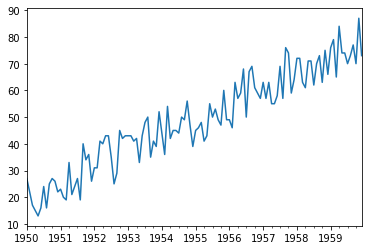

In [43]:
df2['b'].plot()

Making non stationary data stationary taking the difference


In [44]:
from statsmodels.tsa.statespace.tools import diff

In [45]:
df2['b']

1950-01-01    27
1950-02-01    22
1950-03-01    17
1950-04-01    15
1950-05-01    13
              ..
1959-08-01    73
1959-09-01    77
1959-10-01    70
1959-11-01    87
1959-12-01    73
Name: b, Length: 120, dtype: int64

In [46]:
df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

or

In [47]:
diff(df2['b'],k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

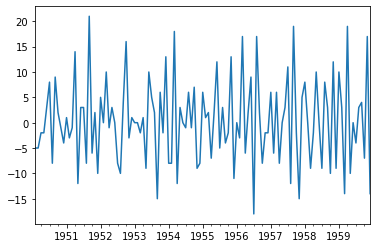

In [48]:
diff(df2['b'],k_diff=1).plot()

How to test stationary

*   Auto-correlation Plot (ACF)
*   Partial Auto-Correlation Plot (PACF)






In [50]:
import statsmodels.api as sm

In [53]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
#NON Stationary
df_non_stationary = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df_non_stationary.index.freq = 'MS'

In [68]:
#Stationary
df_stationary = pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df_stationary.index.freq = 'D'

Autocorrelation 1D

In [77]:
acf(df_stationary)

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825,  0.0650489 ,  0.11466565,  0.1552232 ,  0.12850638,
        0.10358981,  0.09734643,  0.04912286,  0.04022798,  0.05838555,
        0.05359812,  0.10151053,  0.08268663,  0.0912185 ,  0.11192192,
        0.05652846])

In [81]:
pacf_yw(df_stationary,nlags=15,method = 'mle') #max likelihood estimation  -  Could be method = 'unbiased'

array([ 1.        ,  0.21724118,  0.11091851,  0.05800643,  0.04543103,
        0.05504982,  0.04617438,  0.15648712,  0.05939139, -0.02509098,
       -0.00890434,  0.00618762, -0.06821152,  0.00494821,  0.05147711,
        0.06574724])

In [82]:
pacf_yw(df_stationary,nlags=15,method = 'unbiased')

array([ 1.        ,  0.217838  ,  0.11156041,  0.05852814,  0.0459786 ,
        0.05587205,  0.04702029,  0.1597171 ,  0.06104337, -0.02551274,
       -0.00904877,  0.00647964, -0.07058219,  0.0050556 ,  0.05362211,
        0.06878988])

In [99]:
from pandas.plotting import lag_plot

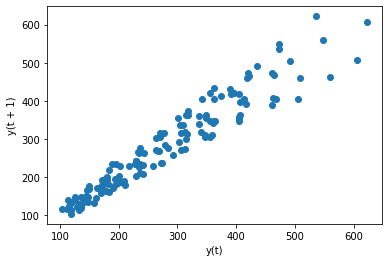

In [100]:
lag_plot(df_non_stationary['Thousands of Passengers'])

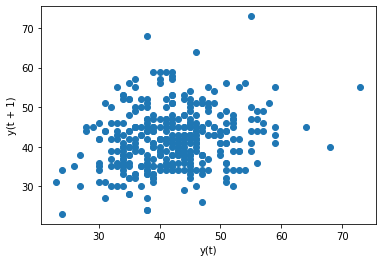

In [101]:
lag_plot(df_stationary['Births'])

In [102]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

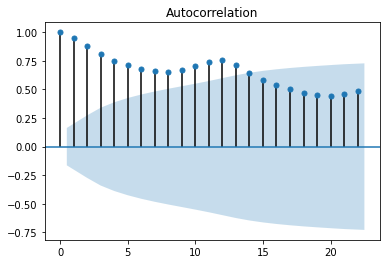

In [105]:
plot_acf(df_non_stationary);

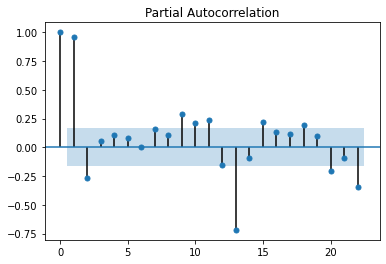

In [106]:
plot_pacf(df_non_stationary);

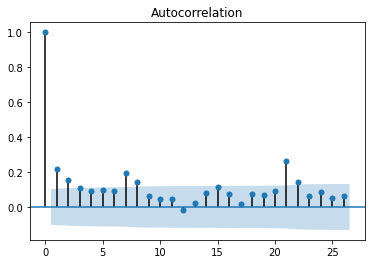

In [107]:
plot_acf(df_stationary);

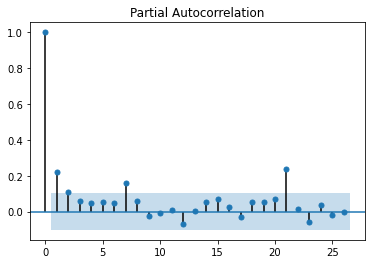

In [109]:
plot_pacf(df_stationary);